# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
data = pd.read_csv('datasets/processed/zomato-final.csv')

In [3]:
data.head(5)

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,South Indian,Street Food,Sushi,Tex-Mex,Thai,Tibetan,Vietnamese,places,cuisine_count,place_type
0,Sahib’s Barbeque by Ohri’s,"Hyderabadi, Awadhi, BBQ",4.9,Excellent,7647,1400,3,Hitech City,Hyderabad,17.441403,...,0,0,0,0,0,0,0,None,3,None
1,Chili's American Grill & Bar,"Mexican, American, Tex-Mex, Burger, Salad",4.9,Excellent,5313,1400,3,Banjara Hills,Hyderabad,17.422829,...,0,0,0,1,0,0,0,None,5,None
2,Ohri's Tansen,North Indian,4.9,Excellent,3076,1500,3,Necklace Road,Hyderabad,17.431671,...,0,0,0,0,0,0,0,None,1,None
3,Ohri's Serengeti,North Indian,4.9,Excellent,2493,1500,3,Banjara Hills,Hyderabad,17.408402,...,0,0,0,0,0,0,0,None,1,None
4,AB's - Absolute Barbecues,"European, Mediterranean, North Indian",4.9,Excellent,7164,1200,3,Gachibowli,Hyderabad,17.442988,...,0,0,0,0,0,0,0,None,3,None


In [4]:
data.columns

Index(['name', 'cuisines', 'aggregate_rating', 'rating_text', 'votes',
       'average_cost_for_two', 'price_range', 'locality', 'city', 'latitude',
       'longitude', 'has_online_delivery', 'has_table_booking', 'American',
       'Andhra', 'Arabian', 'Asian', 'Awadhi', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Burmese', 'Cafe', 'Chinese', 'Coffee',
       'Continental', 'Desserts', 'European', 'Fast Food', 'Gujarati',
       'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Italian', 'Japanese',
       'Juices', 'Lebanese', 'Mediterranean', 'Mexican', 'Modern Indian',
       'Momos', 'Mughlai', 'North Indian', 'Parsi', 'Pizza', 'Rajasthani',
       'Rolls', 'Salad', 'Sandwich', 'Seafood', 'South Indian', 'Street Food',
       'Sushi', 'Tex-Mex', 'Thai', 'Tibetan', 'Vietnamese', 'places',
       'cuisine_count', 'place_type'],
      dtype='object')

In [5]:
data.shape

(132, 62)

# Missing Values

In [6]:
data.isna().sum()

name                    0
cuisines                0
aggregate_rating        0
rating_text             0
votes                   0
average_cost_for_two    0
price_range             0
locality                0
city                    0
latitude                0
longitude               0
has_online_delivery     0
has_table_booking       0
American                0
Andhra                  0
Arabian                 0
Asian                   0
Awadhi                  0
BBQ                     0
Bakery                  0
Beverages               0
Biryani                 0
Burger                  0
Burmese                 0
Cafe                    0
Chinese                 0
Coffee                  0
Continental             0
Desserts                0
European                0
                       ..
Healthy Food            0
Hyderabadi              0
Ice Cream               0
Italian                 0
Japanese                0
Juices                  0
Lebanese                0
Mediterranea

# Preprocessing and visualizations

In [7]:
data.name.value_counts().head()

AB's - Absolute Barbecues    6
Barbeque Pride               4
Paradise Biryani             4
Natural Ice Cream            3
Coconut Juice Bar            3
Name: name, dtype: int64

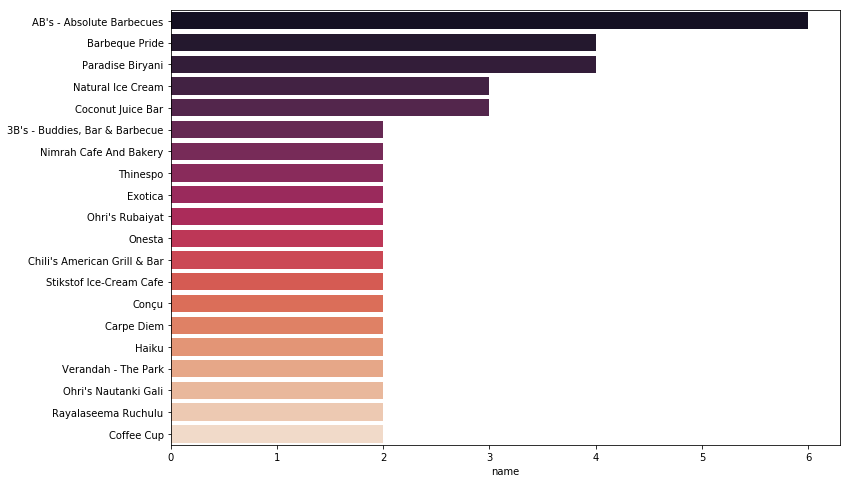

In [8]:
plt.figure(figsize = (12,8))
hotels = data.name.value_counts()[:20]
sns.barplot(hotels,hotels.index,palette="rocket")

AB's Absolute Barbecues has more number of Restaurants in Hyderabad

Online orders

Are restuarants accepting online orders, if yes, how many?

In [9]:
data.has_online_delivery.value_counts()

1    73
0    59
Name: has_online_delivery, dtype: int64

Text(0.5,1,'Online Order')

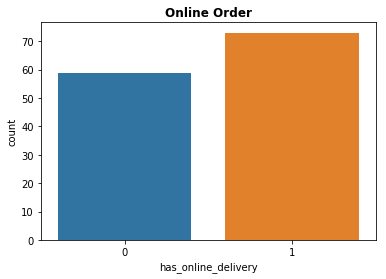

In [10]:
ax = sns.countplot(data['has_online_delivery'])
plt.title('Online Order',weight='bold')

Book Table

In [11]:
data['has_table_booking'].value_counts()

0    80
1    52
Name: has_table_booking, dtype: int64

Text(0.5,1,'Book Table')

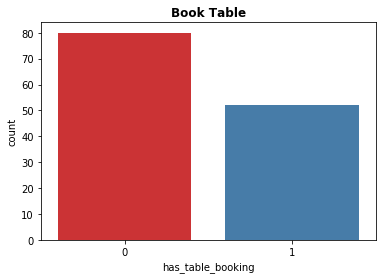

In [12]:
sns.countplot(data['has_table_booking'],palette ='Set1')
plt.title("Book Table",weight='bold')

Major restaurants have table booking

# Location

In [13]:
data['locality'].value_counts()

Jubilee Hills      31
Banjara Hills      24
Hitech City        18
Gachibowli          9
Madhapur            5
Kondapur            4
Basheer Bagh        3
Lakdikapul          3
Sainikpuri          3
Somajiguda          3
Kompally            3
Film Nagar          2
Charminar           2
Paradise Circle     2
Bowenpally          2
Begumpet            2
Necklace Road       2
Rani Gunj           1
Gandipet            1
Ameerpet            1
Marigold Hotel      1
S D Road            1
Srinagar Colony     1
Kukatpally          1
Nampally            1
Karkhana            1
Himayath Nagar      1
Falaknuma           1
S P Road            1
Shamirpet           1
Miyapur             1
Name: locality, dtype: int64

Text(0.5,1,'Location')

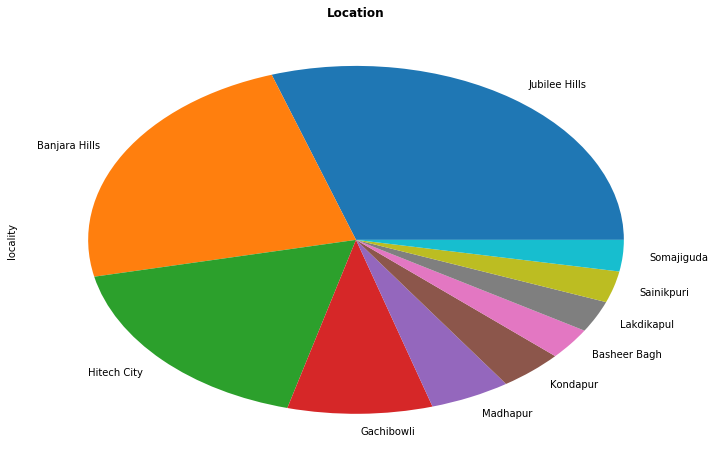

In [14]:
plt.figure(figsize=(12,8)) 
data['locality'].value_counts()[:10].plot(kind = 'pie')
plt.title('Location', weight = 'bold')

Text(0.5,1,'Location vs Count')

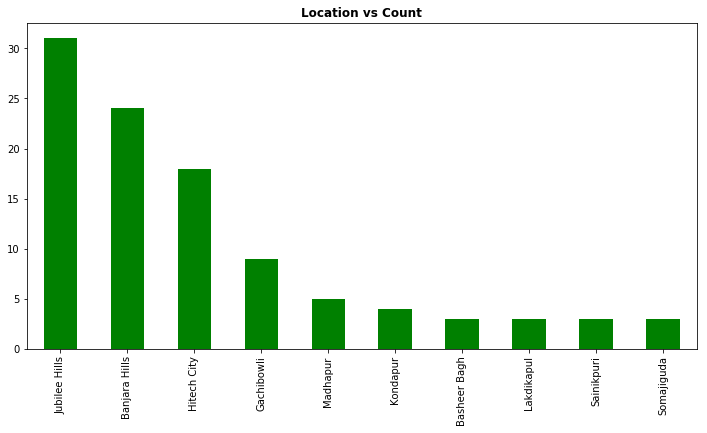

In [15]:
plt.figure(figsize = (12,6))
data['locality'].value_counts()[:10].plot(kind = 'bar', color = 'g')
plt.title("Location vs Count", weight = 'bold')

Highest number of restaurants in Jubliee hills

In [16]:
data['locality'].nunique()

31

In [17]:
cuisines_count= []

for i in data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'Count')

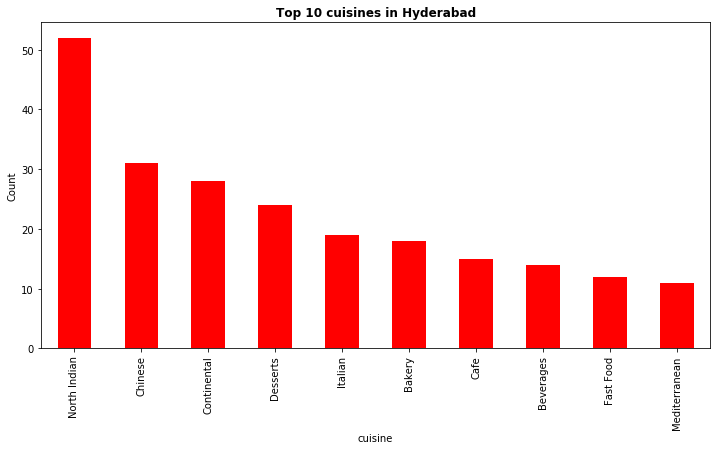

In [18]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Hyderabad',weight='bold')
plt.xlabel('cuisine')
plt.ylabel('Count')

# Rate Vs Online Order

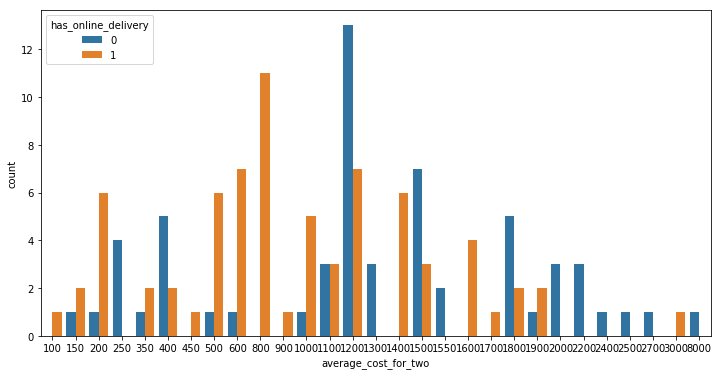

In [19]:
plt.figure(figsize = (12,6))
sns.countplot(x=data['average_cost_for_two'], hue = data['has_online_delivery'])

In [20]:
data['average_cost_for_two'].value_counts()[:20]

1200    20
800     11
1500    10
600      8
1800     7
400      7
200      7
500      7
1000     6
1100     6
1400     6
1600     4
250      4
150      3
2200     3
1900     3
350      3
2000     3
1300     3
1550     2
Name: average_cost_for_two, dtype: int64

Text(0.5,1,'aggregate_rating vs Count')

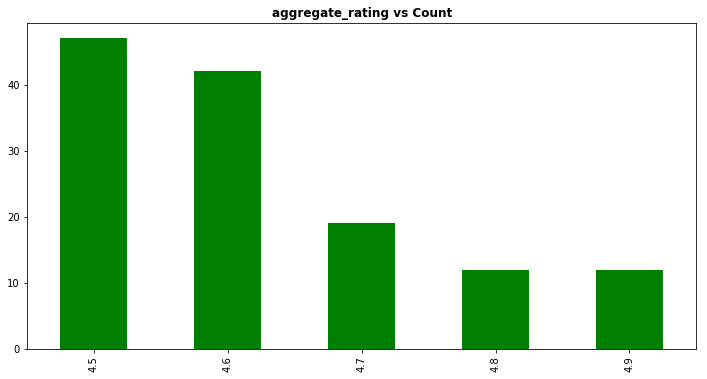

In [21]:
plt.figure(figsize = (12,6))
data['aggregate_rating'].value_counts()[:10].plot(kind = 'bar', color = 'g')
plt.title("aggregate_rating vs Count", weight = 'bold')

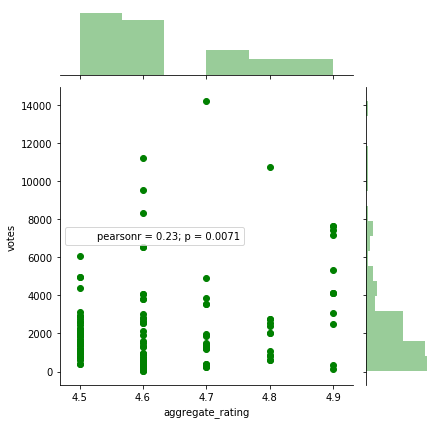

In [23]:
#joint plot for 'rate' and 'votes'
sns.jointplot(x = "aggregate_rating", y = "votes", data = data, ratio=4, color="g")
plt.show()

AttributeError: module 'seaborn' has no attribute 'catplot'